In [3]:
import pandas as pd
import numpy as np


In [23]:
#1. 결측치 처리
data = {'Name': ['Alice', 'Bob', None],
'Age': [25, None, 30],
'Score': [85, 90, None]}
df = pd.DataFrame(data)

In [26]:
# 결측치 대체
df['Age'] = df['Age'].fillna(df['Age'].mean())

df['Score'] = df['Score'].fillna(df['Score'].median())

df['Name'] = df['Name'].fillna(df['Name'].mode()[0])

print(df)

    Name   Age  Score
0  Alice  25.0   85.0
1    Bob  27.5   90.0
2  Alice  30.0   87.5


In [66]:
data = {'Scores': [70, 75, 80, 85, 90, 150, -150]}
df = pd.DataFrame(data)
print(df)

   Scores
0      70
1      75
2      80
3      85
4      90
5     150
6    -150


In [67]:
Q1 = df['Scores'].quantile(0.25)
Q3 = df['Scores'].quantile(0.75)
IQR = Q3 - Q1




In [68]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(lower_bound, upper_bound)

outlier = df[(df['Scores'] < lower_bound) | (df['Scores'] > upper_bound)]
print(outlier)

50.0 110.0
   Scores
5     150
6    -150


In [64]:
# 이상치 삭제
# df = df[(df['Scores'] >= lower_bound) & (df['Scores'] <= upper_bound)]
# print(df)


   Scores
0      70
1      75
2      80
3      85
4      90


In [70]:
# 결측치 대체
df.loc[df['Scores'] < lower_bound, 'Scores'] = lower_bound
df.loc[df['Scores'] > upper_bound, 'Scores'] = upper_bound

print(df)

   Scores
0      70
1      75
2      80
3      85
4      90
5     110
6      50


In [83]:
# 데이터 변환 예제
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 예제 데이터
data = pd.DataFrame({'Original': [1, 4, 16, 36, 100, 1000, 10000]})
print(data)


   Original
0         1
1         4
2        16
3        36
4       100
5      1000
6     10000


In [84]:
data['Log Transformation'] = np.log1p(data['Original'])
data['Square Root Transformation'] = np.sqrt(data['Original'])
print(data)

   Original  Log Transformation  Square Root Transformation
0         1            0.693147                    1.000000
1         4            1.609438                    2.000000
2        16            2.833213                    4.000000
3        36            3.610918                    6.000000
4       100            4.615121                   10.000000
5      1000            6.908755                   31.622777
6     10000            9.210440                  100.000000


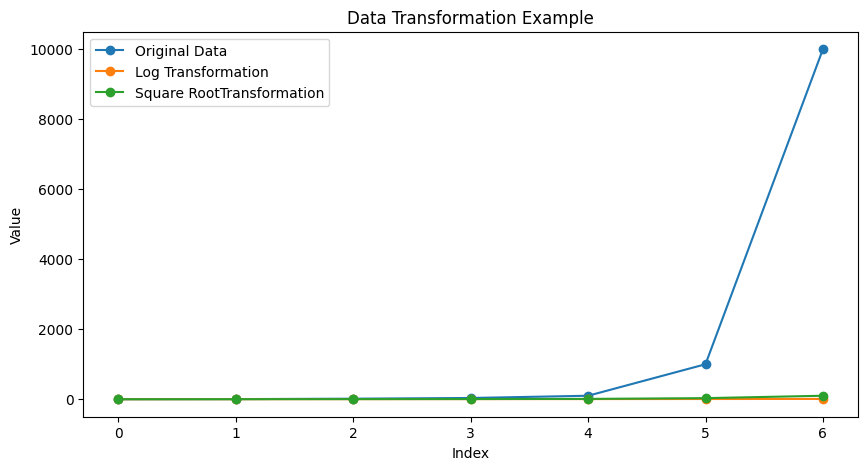

In [88]:
# 데이터 시각화
plt.figure(figsize=(10, 5))
plt.plot(data['Original'], label='Original Data', marker='o')
plt.plot(data['Log Transformation'], label='Log Transformation',marker='o')
plt.plot(data['Square Root Transformation'], label='Square RootTransformation', marker='o')
plt.legend()
plt.title('Data Transformation Example')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [90]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

data = pd.DataFrame({'Original' : [50, 80, 90, 100, 60]})

In [94]:
scaler_standard = StandardScaler()
data['Standardized'] = scaler_standard.fit_transform(data[['Original']])

scaler_minmax = MinMaxScaler()
data['Normalized'] = scaler_minmax.fit_transform(data[['Original']])
print(data)

   Original  Standardized  Normalized
0        50     -1.401826         0.0
1        80      0.215666         0.6
2        90      0.754829         0.8
3       100      1.293993         1.0
4        60     -0.862662         0.2


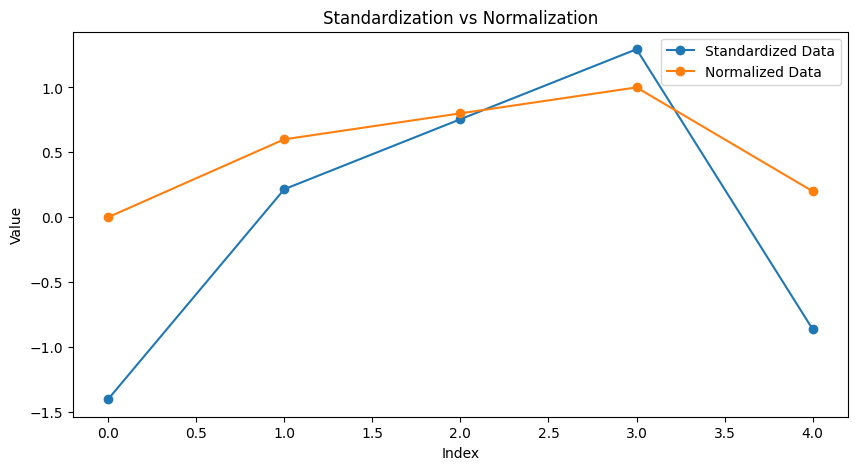

In [98]:

# 데이터 시각화
plt.figure(figsize=(10, 5))
# plt.plot(data['Original'], label='Original Data', marker='o')
plt.plot(data['Standardized'], label='Standardized Data', marker='o')
plt.plot(data['Normalized'], label='Normalized Data', marker='o')
plt.legend()
plt.title('Standardization vs Normalization')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [99]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# 데이터 생성
data = pd.DataFrame({'Fruits': ['사과', '배', '포도', '사과', '포도']})

# Step 1: 레이블 인코딩
label_encoder = LabelEncoder()
data['Label Encoding'] = label_encoder.fit_transform(data['Fruits'])

# Step 2: 원-핫 인코딩 (OneHotEncoder 사용, sparse_output=False로 개선)
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(data[['Label Encoding']])

# Step 3: 결과를 DataFrame으로 변환
one_hot_columns = one_hot_encoder.get_feature_names_out()
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Step 4: 원래 데이터에 추가
data = pd.concat([data, one_hot_df], axis=1)

print(data)

  Fruits  Label Encoding  Label Encoding_0  Label Encoding_1  Label Encoding_2
0     사과               1               0.0               1.0               0.0
1      배               0               1.0               0.0               0.0
2     포도               2               0.0               0.0               1.0
3     사과               1               0.0               1.0               0.0
4     포도               2               0.0               0.0               1.0
